## Step 1: Import Required Libraries

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Understand the Data

In [24]:
# Load the dataset
file_path = 'Amazon Customer Behavior Survey.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Dataset:")
data.head()

Initial Dataset:


Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                   Yes  Few times a month   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1               Keyword            Multiple pages   
2               Keyword            Multiple pages   
3               Keyword                First page   
4                Filter            Multiple pages   

   Customer_Reviews_Importance  ... Saveforlater_Frequency Review_Left  \
0                            1  ...              Sometimes         Yes   
1                            1  ...                 Rarely          No   
2                            2  ...                 Rarely          No   
3                            5  ...              Sometimes         Yes   
4                            1  ...                 Rarely          No   

  Review_Reliability Review_Helpfulness  \
0       Occasionally                Yes   
1            Heavily                Yes   
2       Occasionally                 No   
3            Heavily                Yes   
4            Heavily                Yes   

  Personalized_Recommendation_Frequency  Recommendation_Helpfulness  \
0                                      2                        Yes   
1                                      2                  Sometimes   
2                                      4                         No   
3                                      3                  Sometimes   
4                                      4                        Yes   

  Rating_Accuracy   Shopping_Satisfaction    Service_Appreciation  \
0                1                      1      Competitive prices   
1                3                      2  Wide product selection   
2                3                      3      Competitive prices   
3                3                      4      Competitive prices   
4                2                      2      Competitive prices   

              Improvement_Areas  
0      Reducing packaging waste  
1      Reducing packaging waste  
2  Product quality and accuracy  
3  Product quality and accuracy  
4  Product quality and accuracy  

[5 rows x 23 columns]

Check the records in the data

In [25]:
data.shape # The dataset has 602 records with 21 columns

(602, 23)

In [26]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [27]:
# Summary statistics of the numerical features
data.describe()

age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max                                  5.000000          5.000000   

       Shopping_Satisfaction  
count             602.000000  
mean                2.463455  
std                 1.012152  
min                 1.000000  
25%                 2.000000  
50%                 2.000000  
75%                 3.000000  
max                 5.000000

## Step 3: Data Cleaning

Check for missing values

In [28]:
print(data.isnull().sum())

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

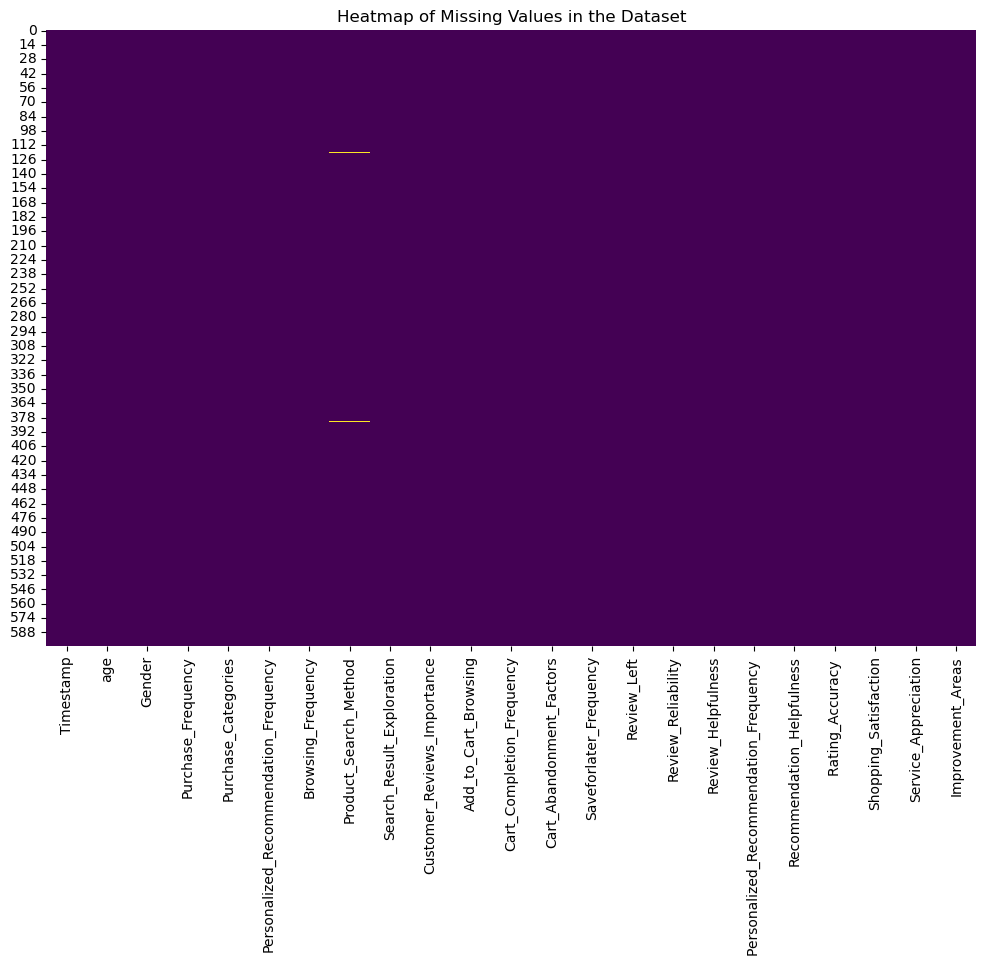

In [29]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()

* The Product_Search_Method column consist of 2 missing values, prompting a data cleaning technique. This would be done in subsequent cells.

In [30]:
# Handle missing values in 'Product_Search_Method' and other relevant columns
columns_with_missing_values = ['Product_Search_Method'] 
imputer = SimpleImputer(strategy='most_frequent')
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])

Check for duplicates and null values

In [31]:
data.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

There are two null values in the product search method, so we'll fill it in with the mode since it's a categorical column

In [32]:
# Fill null values with column mode
data = data.fillna(data.mode().iloc[0])

In [33]:
# Check for duplicates
print("\nDuplicate rows:")
print(data.duplicated().sum()) 


Duplicate rows:
0


There are no duplicate rows

Next, converting timestamp to datetime format

In [39]:
# Convert 'timestamp' to datetime format if available
date = data['Timestamp']
timestamp = pd.to_datetime(date)

print(timestamp)

C:\Users\Adeitan Richard\AppData\Local\Temp\ipykernel_6920\2591878012.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timestamp = pd.to_datetime(date)


0     2023-06-04 13:28:19-05:30
1     2023-06-04 14:30:44-05:30
2     2023-06-04 17:04:56-05:30
3     2023-06-04 17:13:00-05:30
4     2023-06-04 17:28:06-05:30
                 ...           
597   2023-06-12 16:02:02-05:30
598   2023-06-12 16:02:53-05:30
599   2023-06-12 16:03:59-05:30
600   2023-06-12 21:57:20-05:30
601   2023-06-16 09:16:05-05:30
Name: Timestamp, Length: 602, dtype: datetime64[ns, UTC-05:30]


* Handling Outliers

In [40]:
from scipy import stats

# Identify and handle outliers using Z-score method
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
data = data[~outliers]

print("\nDataset after handling outliers:")
print(data.shape)


Dataset after handling outliers:
(597, 23)


## Step 3: Data Visualization

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

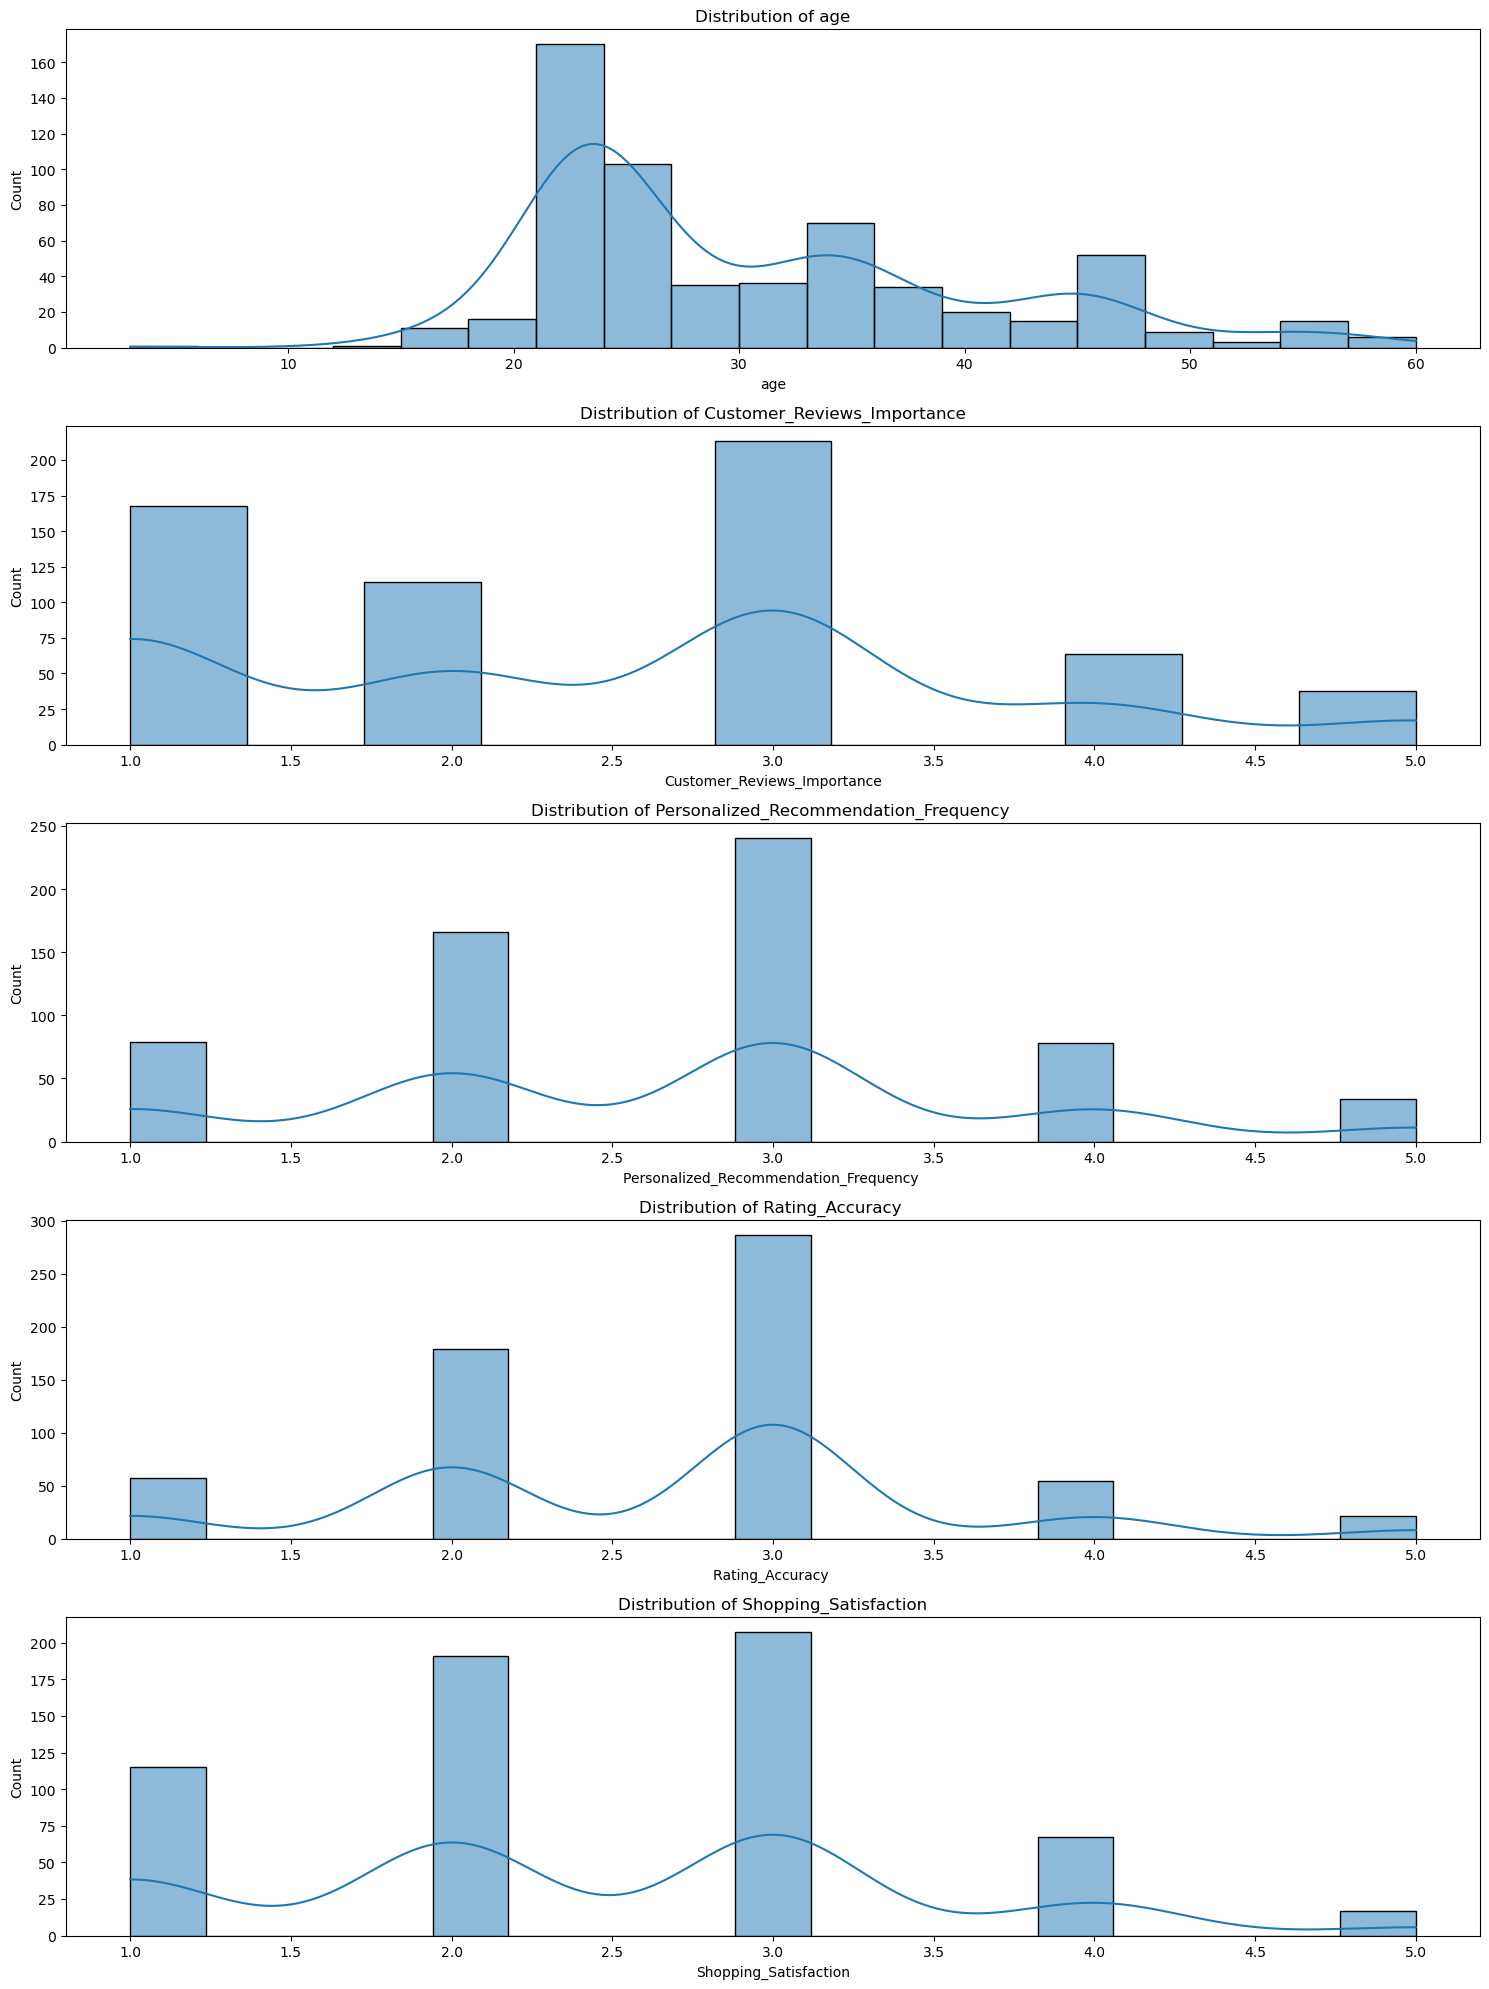

In [41]:
# Visualize the distribution of numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

* Based on the visualizations, It can be noted that the age profiles of Amazon customers are within the range of 20-26 years of age.
* Also, it is importance to notice that the shopping satifaction is majorly 2-3 stars. Therefore, it is important to take action to rectify this problem by optimizing Amazon's website for better ratings and satisfaction.

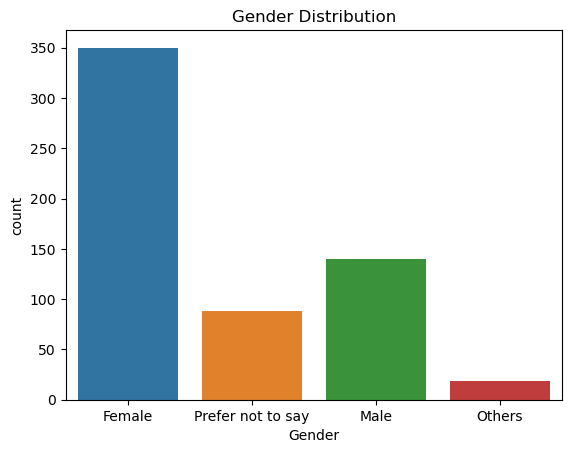

In [43]:
# Analyze potential biases in the dataset (e.g., gender distribution)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

* Based on gender distribution, the female are exceedingly far more than the males, further analysis should be done to examine the cause of gender bias.

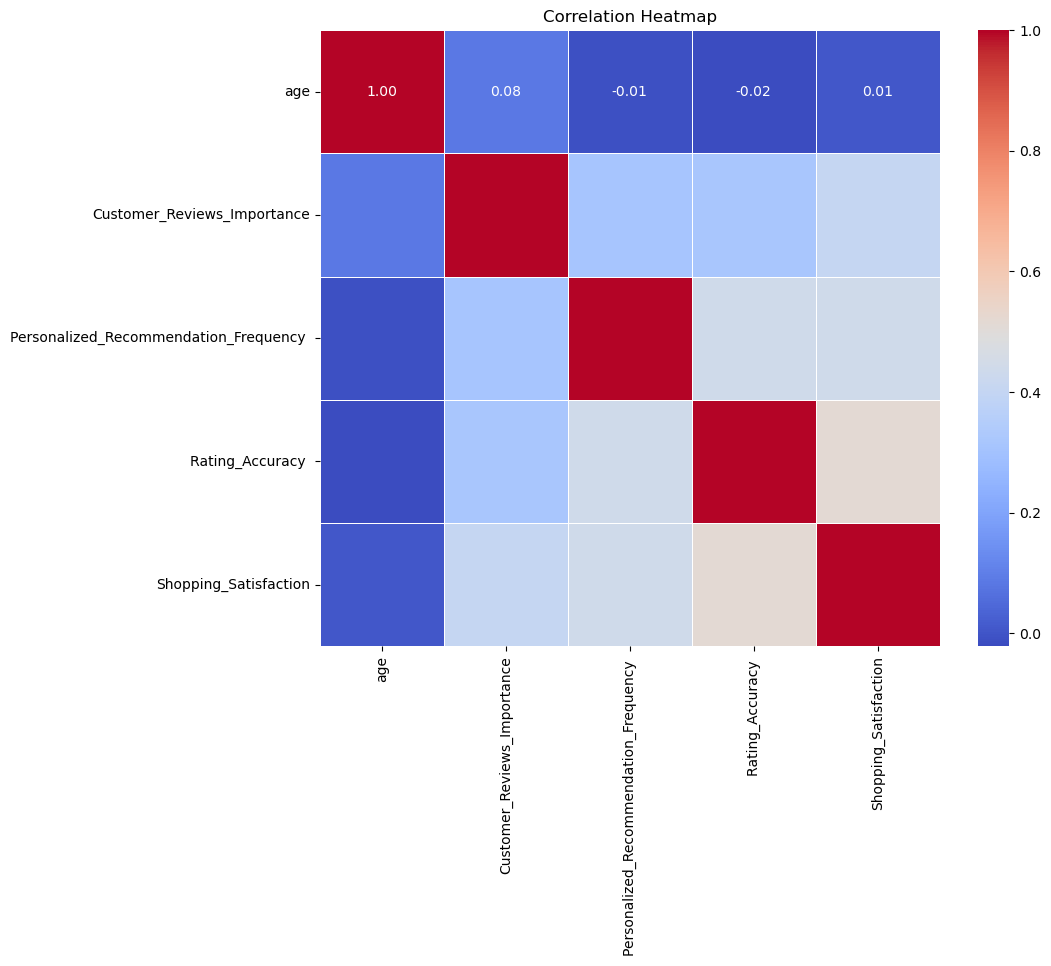

In [44]:
# Correlation heatmap with annotations
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Encoding categorical variables

In [45]:
# Convert categorical variables to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [46]:
data.head()

Timestamp  age  Gender  Purchase_Frequency  Purchase_Categories  \
0          9   23       0                   0                    0   
1         10   23       0                   3                    8   
2         11   24       3                   0                   20   
3         12   24       0                   3                    4   
4         13   22       0                   1                    1   

   Personalized_Recommendation_Frequency  Browsing_Frequency  \
0                                      2                   1   
1                                      2                   0   
2                                      0                   0   
3                                      1                   0   
4                                      2                   0   

   Product_Search_Method  Search_Result_Exploration  \
0                      1                          1   
1                      1                          1   
2                      1                          1   
3                      1                          0   
4                      0                          1   

   Customer_Reviews_Importance  ...  Saveforlater_Frequency  Review_Left  \
0                            1  ...                       4            1   
1                            1  ...                       3            0   
2                            2  ...                       3            0   
3                            5  ...                       4            1   
4                            1  ...                       3            0   

   Review_Reliability  Review_Helpfulness  \
0                   3                   2   
1                   0                   2   
2                   3                   0   
3                   0                   2   
4                   0                   2   

   Personalized_Recommendation_Frequency   Recommendation_Helpfulness  \
0                                       2                           2   
1                                       2                           1   
2                                       4                           0   
3                                       3                           1   
4                                       4                           2   

   Rating_Accuracy   Shopping_Satisfaction  Service_Appreciation  \
0                 1                      1                     2   
1                 3                      2                     8   
2                 3                      3                     2   
3                 3                      4                     2   
4                 2                      2                     2   

   Improvement_Areas  
0                 11  
1                 11  
2                  9  
3                  9  
4                  9  

[5 rows x 23 columns]

* In order to get a better model results, removing unneccessary columns is paramount

Remove unnecessary columns

In [47]:
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [48]:

# List of columns to remove
columns_to_remove = [
    'Timestamp', 
    'Gender', 
    'Review_Left', 
    'age', 
    'Improvement_Areas', 
    'Service_Appreciation', 
    'Browsing_Frequency', 
    'Product_Search_Method',
    'Review_Reliability', 
    'Review_Helpfulness',
    'Search_Result_Exploration', 
    'Recommendation_Helpfulness', 
    'Add_to_Cart_Browsing', 
    'Customer_Reviews_Importance',
    'Service_Appreciation',
    'Improvement_Areas'
]


# Drop the columns from the DataFrame
data_cleaned = data.drop(columns=columns_to_remove)

# Display the cleaned DataFrame
data_cleaned.head()

Purchase_Frequency  Purchase_Categories  \
0                   0                    0   
1                   3                    8   
2                   0                   20   
3                   3                    4   
4                   1                    1   

   Personalized_Recommendation_Frequency  Cart_Completion_Frequency  \
0                                      2                          4   
1                                      2                          2   
2                                      0                          4   
3                                      1                          4   
4                                      2                          4   

   Cart_Abandonment_Factors  Saveforlater_Frequency  \
0                         1                       4   
1                         2                       3   
2                         1                       3   
3                         1                       4   
4                         2                       3   

   Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                                       2                 1   
1                                       2                 3   
2                                       4                 3   
3                                       3                 3   
4                                       4                 2   

   Shopping_Satisfaction  
0                      1  
1                      2  
2                      3  
3                      4  
4                      2

## Feature Engineering

In [49]:
# Create a new feature combining 'Rating_Accuracy' and 'Shopping_Satisfaction'
data_cleaned['Satisfaction_Score'] = data_cleaned['Rating_Accuracy '] * data_cleaned['Shopping_Satisfaction']

In [50]:
# Normalize the remaining numerical data using StandardScaler
scaler = StandardScaler()
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Display the first few rows of the cleaned and scaled DataFrame
data_cleaned.head()

Purchase_Frequency  Purchase_Categories  \
0                   0                    0   
1                   3                    8   
2                   0                   20   
3                   3                    4   
4                   1                    1   

   Personalized_Recommendation_Frequency  Cart_Completion_Frequency  \
0                                      2                          4   
1                                      2                          2   
2                                      0                          4   
3                                      1                          4   
4                                      2                          4   

   Cart_Abandonment_Factors  Saveforlater_Frequency  \
0                         1                       4   
1                         2                       3   
2                         1                       3   
3                         1                       4   
4                         2                       3   

   Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                               -0.676310         -1.862475   
1                               -0.676310          0.368012   
2                                1.250931          0.368012   
3                                0.287311          0.368012   
4                                1.250931         -0.747232   

   Shopping_Satisfaction  Satisfaction_Score  
0              -1.443019           -1.316625  
1              -0.457341           -0.228249  
2               0.528336            0.424777  
3               1.514014            1.077802  
4              -0.457341           -0.663599

## Dimensionality Reduction

In [51]:
# Dimensionality Reduction
# Apply PCA to reduce dimensions before clustering
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
data_pca = pca.fit_transform(data_cleaned[numerical_columns])


## Saving the Data

In [52]:
# Save the cleaned and scaled dataset to a CSV file locally
file_path = 'Finalized_Amazon_Customer_Behavior.csv'
data_cleaned.to_csv(file_path, index=False)

print(f"The cleaned and scaled dataset has been saved as '{file_path}'.")


The cleaned and scaled dataset has been saved as 'Finalized_Amazon_Customer_Behavior.csv'.


## Github Finalized Dataset Link

* https://github.com/DonnnRichieee/Finialized_dataset.git
